In [1]:
# download 2022 January Yellow Taxi Trip Records (PARQUET)
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet

--2023-05-23 06:00:02--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.65.190.176, 18.65.190.148, 18.65.190.69, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.65.190.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38139949 (36M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2022-01.parquet.1’

yellow_tripdata_202 100%[===================>]  36.37M  4.85MB/s    in 7.7s    

2023-05-23 06:00:10 (4.72 MB/s) - ‘yellow_tripdata_2022-01.parquet.1’ saved [38139949/38139949]



In [2]:
# download 2022 February Yellow Taxi Trip Records (PARQUET)
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet

--2023-05-23 06:00:10--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.65.190.25, 18.65.190.69, 18.65.190.148, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.65.190.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45616512 (44M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2022-02.parquet.1’

yellow_tripdata_202 100%[===================>]  43.50M  4.31MB/s    in 9.4s    

2023-05-23 06:00:20 (4.65 MB/s) - ‘yellow_tripdata_2022-02.parquet.1’ saved [45616512/45616512]



In [1]:
# show me the size of the datasets
!du -sh *

32K	duration-prediction.ipynb
88K	homework1.ipynb
37M	yellow_tripdata_2022-01.parquet
44M	yellow_tripdata_2022-02.parquet


In [2]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
parquet_file_path = 'yellow_tripdata_2022-01.parquet'
df = pd.read_parquet(parquet_file_path)

In [4]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN


## Q1. Downloading the data

Read the data for January. How many columns are there?

In [5]:
df.shape

(2463931, 19)

Answer - 19 columns

## Q2. Computing duration

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

In [6]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [7]:
print(f"{df['duration'].std():.2f}")

46.45


The standard deviation is 46.45

## Q3. Dropping outliers

Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

In [8]:
len_of_df = df.shape[0]
len_of_df

2463931

In [9]:
# clearing data
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [10]:
len_of_clear_df = df.shape[0]
len_of_clear_df

2421440

In [11]:
data_fraction = len_of_clear_df / len_of_df
print(f"{data_fraction:.2%}")

98.28%


Answer - 98%

## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

In [12]:
categorical_features = ['PULocationID', 'DOLocationID']
df[categorical_features] = df[categorical_features].astype(str)

/tmp/ipykernel_1878842/3401862978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_features] = df[categorical_features].astype(str)


In [13]:
def get_input_matrix(df, categorical_features,  dv=None):
    train_dicts = df[categorical_features].to_dict(orient='records')
    
    if dv is None:
        dv = DictVectorizer()
        X_train = dv.fit_transform(train_dicts)
    else:
        X_train = dv.transform(train_dicts)
    
    return X_train, dv

In [14]:
X_train, dv = get_input_matrix(df, categorical_features)

In [15]:
X_train.shape

(2421440, 515)

Answer - 515

## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model.

* Train a plain linear regression model with default parameters
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

In [16]:
target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

Accirding to sklearn docs ([link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).

We have parameter:
```
squaredbool, default=True

    If True returns MSE value, if False returns RMSE value.
```


In [17]:
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"{rmse:.2f}")

6.99


Answer - 6.99

/tmp/ipykernel_1878842/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_1878842/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


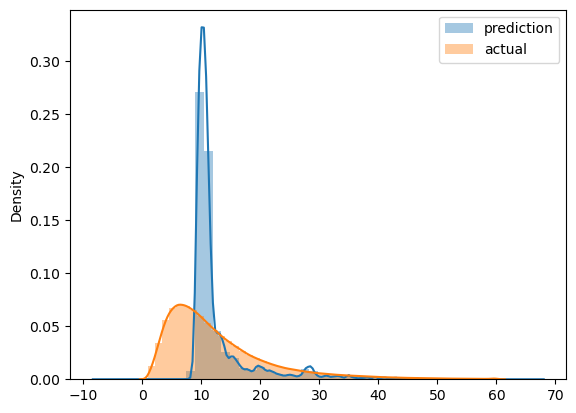

In [18]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

It seems we have a strong outburst.

## Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2022).

What's the RMSE on validation?


In [19]:
val_parquet_file_path = 'yellow_tripdata_2022-02.parquet'
categorical_features = ['PULocationID', 'DOLocationID']

In [20]:
def read_dataframe(filename, categorical_features):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)
        
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)
        
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    # clearing data
    df = df[(df.duration >= 1) & (df.duration <= 60)]
    
    categorical_features = ['PULocationID', 'DOLocationID']
    df[categorical_features] = df[categorical_features].astype(str)
    
    return df

In [21]:
val_df = read_dataframe(val_parquet_file_path, categorical_features)

In [22]:
X_val = get_input_matrix(val_df, categorical_features,  dv)[0]

In [23]:
X_val.shape

(2918187, 515)

In [24]:
target = 'duration'
y_val = val_df[target].values

y_pred = lr.predict(X_val)

In [25]:
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"{rmse:.2f}")

7.79


Answer - 7.79

/tmp/ipykernel_1878842/2518719256.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_1878842/2518719256.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val, label='actual')


<Axes: ylabel='Density'>

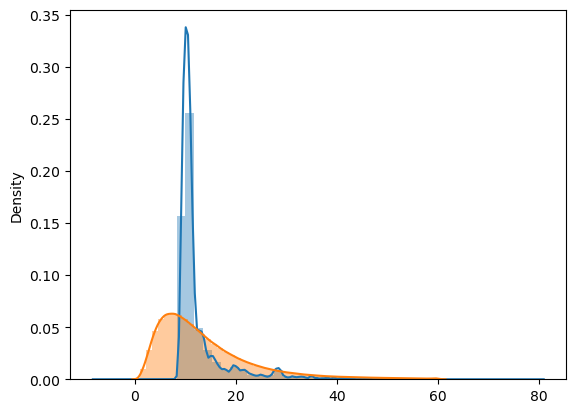

In [26]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_val, label='actual')